In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
import radar_plot as rplt

# Paquete radar_plot (rplt)


El paquete radar_plot tiene una serie de funciones que nos permiten tres cosas. Principalmente nos importan 2.

Funciones
-------------------------
1. example_data: Contiene una serie de datos de ejemplo que pueden servir para conocer mejor el formato de los
datos que s equieren gráficar y rapidamente hacer un demo del gráfico.

2. multi_radar_plot: Es la función que nos permitira hacer el gráfico de radar. Esta función contiene varios 
parametros entre los cuales encontramos: 

    * **df:** Un objeto de tipo lista cuyos elementos seran tuples con los elementos de cada unos de los graficos.
    
    * **var_names:** Un array con los nombres de las variables (las variables son las que van en la parte de afuera del
    grafico).
    
    * **frame:** String que me dice el tipo de gráfico que quiero (polygon/circle).
    
    * **n_cols:** Número de columnas (Por default 2).
    
    * **n_rows:** Número de filas.
    
    * **title:** El titulo que vamos a darle al gráfico.
    
    * **fill:** Boolean que toma True si queremos que los gráficos esten rellenados o no.
    
    * **fig_size:** Tamaño del plot que queremos hacer, por default este sera 10x10 (ancho*alto).
    
    * **color:** Colores que queremos que tenga nuestro gráfico.
    
    * **grids:** Definimos un array con las divisiones que queremos que tenga nuestro gráfico.
    * **size:** El tamaño del titulo del gráfico.
    
Algunos de estos parametros tienen valores por default que se pueden personalizar


In [2]:
#Aqui se supone que voy a importar los datos, ok ? Si, señor
path='/Users/diegoalejandrobermudezsierra/OneDrive - Universidad de los Andes/BAROMETRO DE XENOFOBIA/PUBLICACIONES BAROMETRO/INFORME FEB-21/DATOS'
for i in ['Educacion', 'Salud', 'Total', 'Trabajo', 'Xenofobia', 'Vivienda', 'Seguridad']:
    file='.'.join([i, 'xlsx'])
    path_file='/'.join([path, file])
    vars()[i.lower()]=pd.read_excel(path_file)
    
    
del i, path, file, path_file

total.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/diegoalejandrobermudezsierra/OneDrive - Universidad de los Andes/BAROMETRO DE XENOFOBIA/PUBLICACIONES BAROMETRO/INFORME FEB-21/DATOS/Educacion.xlsx'

In [ ]:
df=pd.merge(total, educacion, on='queries', how='left')
df=pd.merge(df, salud, on='queries', how='left')
df=pd.merge(df, trabajo, on='queries', how='left')
df=pd.merge(df, xenofobia, on='queries', how='left')
df=pd.merge(df, vivienda, on='queries', how='left')
df=pd.merge(df, seguridad, on='queries', how='left')

df.head()

In [ ]:
df['queries']=df['queries'].str.replace(', Colombia', '')

for i in ['Educación', 'Salud', 'Trabajo', 'Xenofobia', 'Vivienda', 'Seguridad']:
    variable='_'.join(['tasa', i])
    df[variable]=(df[i]/df['Total']).round(2)
    
    df=df.drop([i], axis=1)
    
    mis=df.loc[df[variable].isnull()].index
    col_num=df.columns.get_loc(variable)
    
    for j in range(len(mis)):
        pos=mis[j]
        df.iloc[pos, col_num]=0

    
df.columns=['queries', 'Total', 'Educación', 'Salud', 'Trabajo', 'Xenofobia', 'Vivienda', 'Seguridad']   

del i, variable, j, pos, col_num, mis

df.head(10)

In [ ]:
df.sort_values(by=['Total'], ascending=False).head(10)

In [9]:
fifa=pd.read_csv('/Users/diegoalejandrobermudezsierra/OneDrive - Universidad de los Andes/BX/PUBLICACIONES BX/INFORME FEB-21/DATOS/Fifa0121.csv')
fifa=fifa.drop(['Xenofobia', 'Educacion', 'Salud', 'Trabajo', 'Seguridad'], axis=1)
fifa.columns=['Region', 'area', 'Total', 'Xenofobia', 'Educación', 'Salud', 'Trabajo', 'Seguridad']
fifa=fifa.round(2)
fifa=fifa.loc[fifa['Total']>200]
fifa.iloc[0, 0]='Bogotá'
fifa

,Region,area,Total,Xenofobia,Educación,Salud,Trabajo,Seguridad
0,Bogotá,11,18134,14.87,2.25,18.40,5.90,15.93
1,Antioquia,5,3908,15.84,1.87,12.69,5.09,15.58
2,Valle del Cauca,76,2145,19.95,1.54,17.30,4.71,14.31
3,Atlántico,8,1494,15.80,2.61,12.52,6.49,15.26
4,Santander,68,1101,14.44,2.82,15.99,4.72,13.35
5,Norte de Santander,54,980,8.06,3.47,10.20,4.80,18.27
6,Bolívar,13,724,7.32,1.93,13.67,9.25,12.15
7,Magdalena,47,379,14.51,1.85,13.72,4.75,23.75
8,Risaralda,66,345,14.49,1.16,17.68,3.48,14.49
9,Meta,50,308,20.78,2.92,15.91,5.52,18.18


In [10]:
temp=fifa.copy()


temp=temp.sort_values(by=['Region'], ascending=True).reset_index(drop=True)
ciudades=list(temp['Region'])
temp=rplt.to_tupple_list(df=temp, categorias=ciudades, start=3, end=len(temp.columns))
temp

[('Antioquia', [[15.84, 1.87, 12.69, 5.09, 15.58]]),
 ('Atlántico', [[15.8, 2.61, 12.52, 6.49, 15.26]]),
 ('Bogotá', [[14.87, 2.25, 18.4, 5.9, 15.93]]),
 ('Bolívar', [[7.32, 1.93, 13.67, 9.25, 12.15]]),
 ('Boyacá', [[4.91, 4.02, 13.84, 3.57, 25.0]]),
 ('Cesar', [[12.46, 2.36, 17.85, 2.02, 21.89]]),
 ('Córdoba', [[11.21, 0.86, 16.81, 4.74, 23.28]]),
 ('Magdalena', [[14.51, 1.85, 13.72, 4.75, 23.75]]),
 ('Meta', [[20.78, 2.92, 15.91, 5.52, 18.18]]),
 ('Norte de Santander', [[8.06, 3.47, 10.2, 4.8, 18.27]]),
 ('Risaralda', [[14.49, 1.16, 17.68, 3.48, 14.49]]),
 ('Santander', [[14.44, 2.82, 15.99, 4.72, 13.35]]),
 ('Tolima', [[17.08, 2.92, 19.58, 7.5, 20.42]]),
 ('Valle del Cauca', [[19.95, 1.54, 17.3, 4.71, 14.31]])]

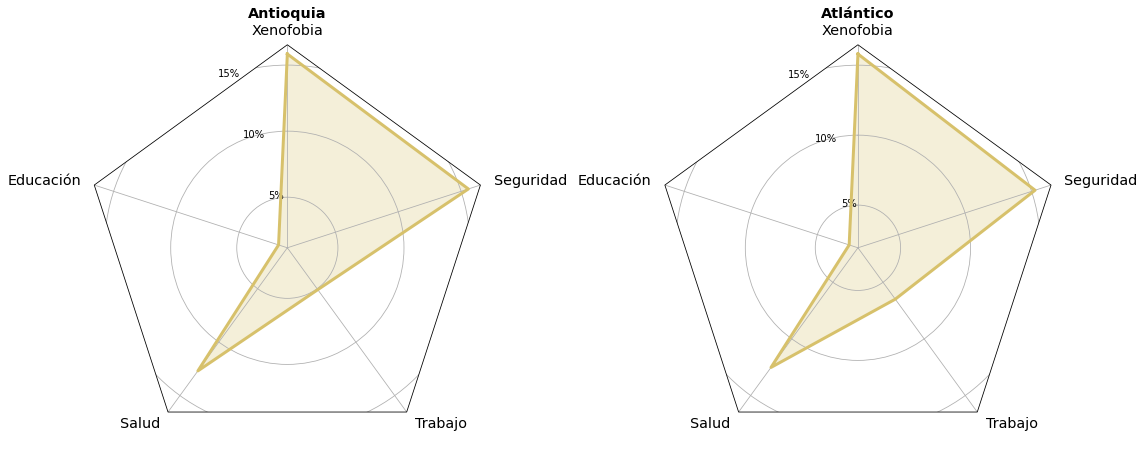

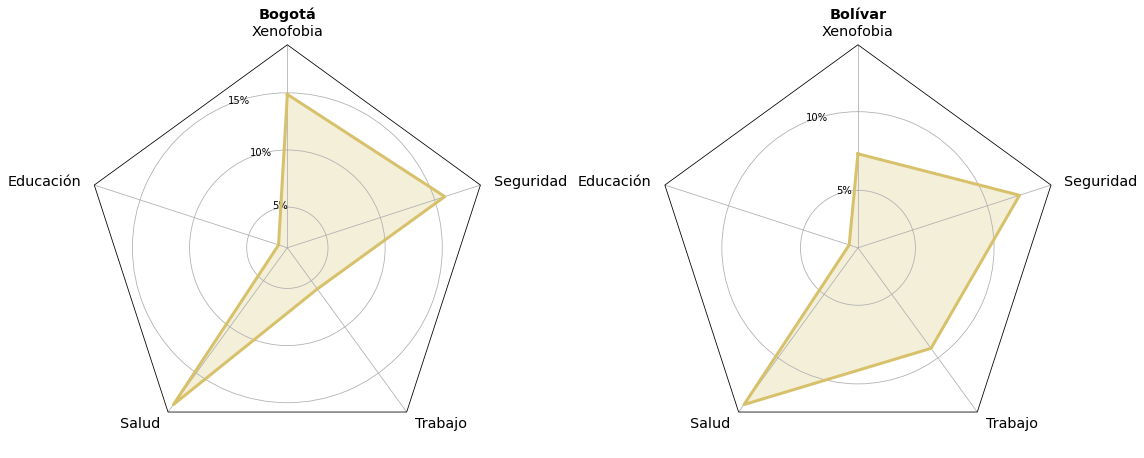

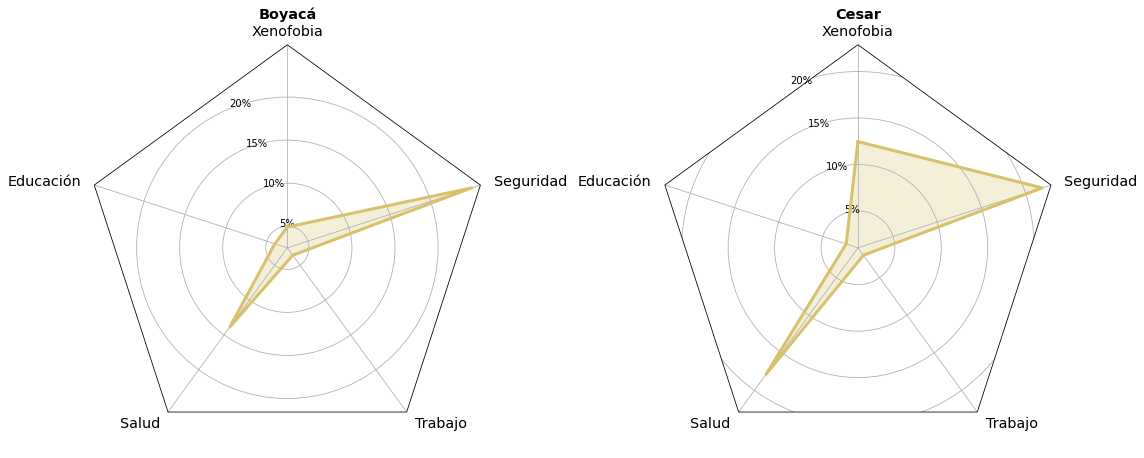

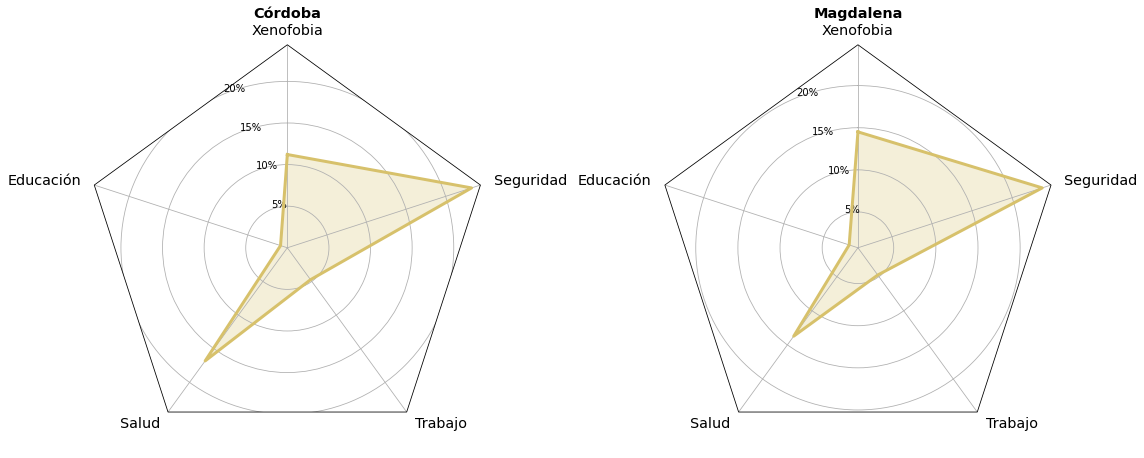

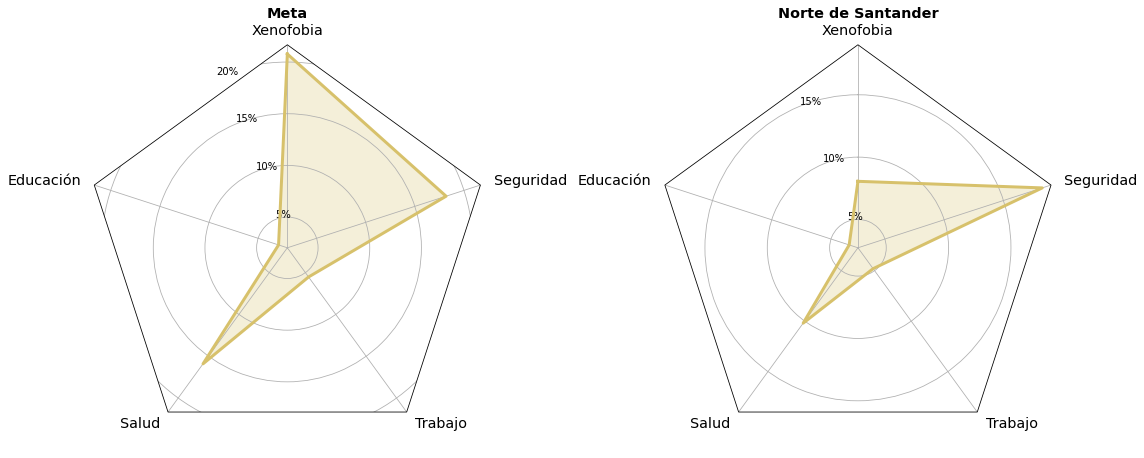

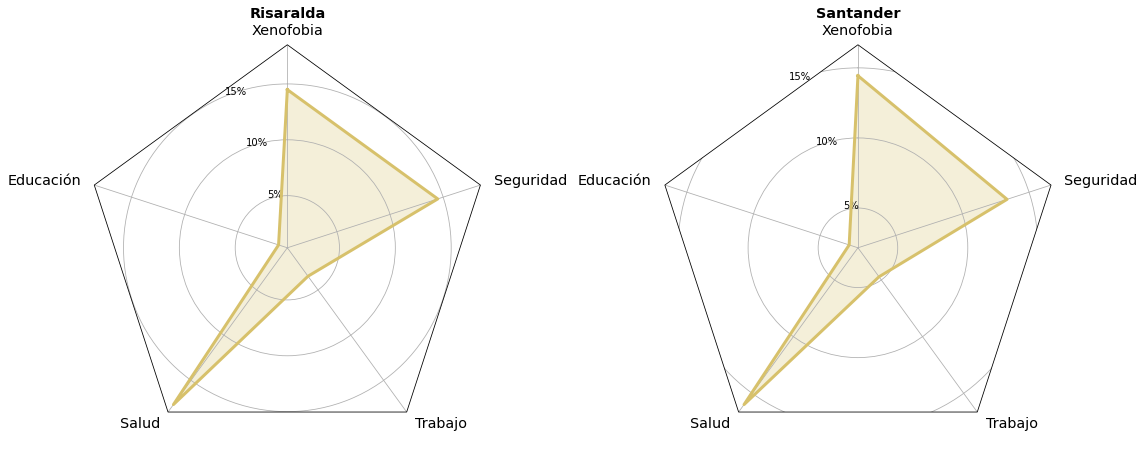

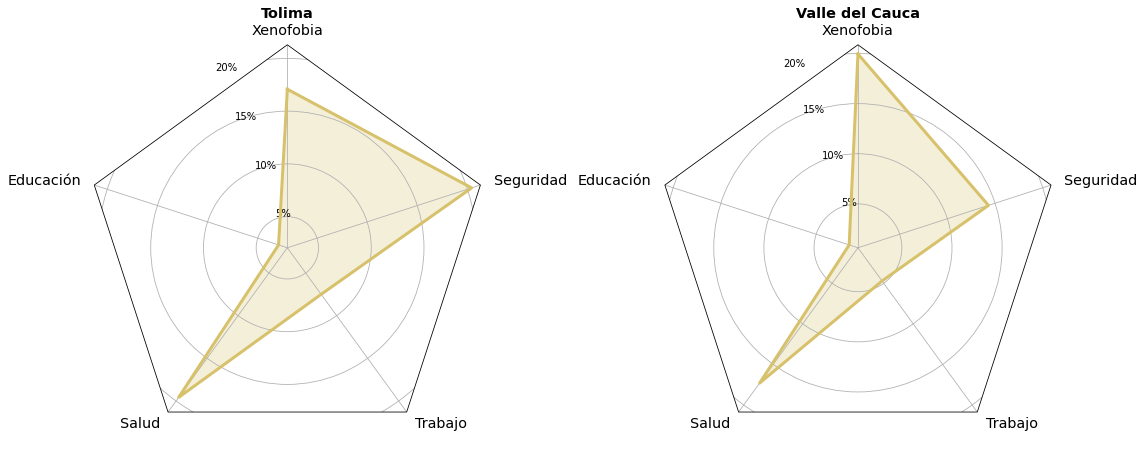

In [15]:
variables=list(fifa.columns[3:len(fifa.columns)])

i=0
j=2
for ciudad in range(round((len(ciudades))/2)):
    fig, ax=rplt.multi_radar_plot(temp[i:j], 
                                  variables, 
                                  'polygon',  
                                  fig_size=(16, 16), 
                                  grids=[5, 10, 15, 20, 30, 40, 50],
                                  fill=True,
                                  size='xx-large',
                                  n_cols=2,
                                  n_rows=1,
                             )
    nombre='_'.join(['temp', str(i)])
    nombre='.'.join([nombre, "jpg"])
    fig.savefig(nombre)
    i=j
    j+=2

plt.show()

Index(['Xenofobia', 'Educación', 'Salud', 'Trabajo', 'Seguridad'], dtype='object')

In [ ]:
temp=fifa.copy()

xenofobia=temp.sort_values(by=['Xenofobia'], ascending=False).head(4)
temp=temp.drop(xenofobia.index)
xenofobia=xenofobia.reset_index(drop=True)
ciudades=list(xenofobia['Region'])
xenofobia=rplt.to_tupple_list(df=xenofobia, categorias=ciudades, start=3, end=len(xenofobia.columns))


educacion=temp.sort_values(by=['Educación'], ascending=False).head(4)
temp=temp.drop(educacion.index)
educacion=educacion.reset_index(drop=True)
ciudades=list(educacion['Region'])
educacion=rplt.to_tupple_list(df=educacion, categorias=ciudades, start=3, end=len(educacion.columns))


salud=temp.sort_values(by=['Salud'], ascending=False).head(4)
temp=temp.drop(salud.index)
salud=salud.reset_index(drop=True)
ciudades=list(salud['Region'])
salud=rplt.to_tupple_list(df=salud, categorias=ciudades, start=3, end=len(salud.columns))


trabajo=temp.sort_values(by=['Trabajo'], ascending=False).head(4)
temp=temp.drop(trabajo.index)
trabajo=trabajo.reset_index(drop=True)
ciudades=list(trabajo['Region'])
trabajo=rplt.to_tupple_list(df=trabajo, categorias=ciudades, start=3, end=len(trabajo.columns))

In [ ]:
ciudades=list(fifa.iloc[:, 0])
fifa=rplt.to_tupple_list(df=fifa, categorias=ciudades, start=3, end=len(fifa.columns))

In [ ]:
variables=['Xenofobia', 'Eduación', 'Salud', 'Trabajo', 'Seguridad']
fig, ax=rplt.multi_radar_plot(xenofobia, 
                              variables, 
                              'polygon', 
                              'Evolución de la Conversación de Migración por Ciudades',  
                              fig_size=(16, 16), 
                              grids=[5, 10, 15, 20, 30, 40, 50],
                              fill=True,
                              size='xx-large',
                              n_cols=2,
                              n_rows=2,
                             )

fig.savefig('xenofobia.jpg')
plt.show()

In [ ]:
fig, ax=rplt.multi_radar_plot(educacion, 
                              variables, 
                              'polygon', 
                              'Evolución de la Conversación de Migración por Ciudades',  
                              fig_size=(16, 16), 
                              grids=[4, 8, 12, 16, 20,],
                              fill=True,
                              size='xx-large',
                              n_cols=2,
                              n_rows=2,
                             )

fig.savefig('educacion.jpg')
plt.show()

In [ ]:
fig, ax=rplt.multi_radar_plot(salud, 
                              variables, 
                              'polygon', 
                              'Evolución de la Conversación de Migración por Ciudades',  
                              fig_size=(16, 16), 
                              grids=[4, 8, 12, 16, 20,],
                              fill=True,
                              size='xx-large',
                              n_cols=2,
                              n_rows=2,
                             )

fig.savefig('salud.jpg')
plt.show()

In [ ]:
fig, ax=rplt.multi_radar_plot(trabajo, 
                              variables, 
                              'polygon', 
                              'Evolución de la Conversación de Migración por Ciudades',  
                              fig_size=(16, 8), 
                              grids=[4, 8, 12, 16, 20,],
                              fill=True,
                              size='xx-large',
                              n_cols=2,
                              n_rows=1,
                             )

fig.savefig('trabajo.jpg')
plt.show()

### A continuación algunos ejemplos de la implementación de nuestra función de gráficos.


In [ ]:
spoke_labels, data=rplt.example_data()

fig, ax=rplt.multi_radar_plot(data, spoke_labels, 
                         'polygon', 
                         'Evolución de la Conversación de Migración por Ciudades',  
                         fig_size=(20, 20), grids=[0.20, 0.40, 0.60, 0.80], size='xx-large')


# Agregamos las leyendas que se refieren a cada uno de los factores 
labels = ('Barrio1', 'Barrio2', 'Barrio3', 'Barrio4', 'Barrio5')
#Decimos donde queremos que vaya la leyenda y con qué diseño
legend=fig.legend(labels, loc=10, labelspacing=0.1, fontsize='small')


#Ploteamos esta vuelta
plt.show()

In [ ]:
last10=df.sort_values(by=['Total'], ascending=True).head(10).reset_index(drop=True)

last10=last10.drop(['Total'], axis=1)

last10.iloc[:, 1:len(last10.columns)]=last10.iloc[:, 1:len(last10.columns)]*100

last10['marca']='last10'

ciudades_last10=list(last10['queries'])


In [ ]:
top10=df.sort_values(by=['Total'], ascending=False).head(10).reset_index(drop=True)

top10=top10.drop(['Total'], axis=1)

top10.iloc[:, 1:len(top10.columns)]=top10.iloc[:, 1:len(top10.columns)]*100

top10['marca']='top10'

ciudades_top10=list(top10['queries'])

In [ ]:
combinado10=pd.concat([top10, last10])
combinado10.head()

In [ ]:
prueba=rplt.to_tupple_list(df=top10, categorias=ciudades_top10, start=1, end=len(top10.columns)-1)

prueba

In [ ]:
variables=['Educación', 'Salud', 'Trabajo', 'Xenofobia', 'Vivienda', 'Seguridad']

fig=rplt.multi_radar_plot(prueba, 
                              variables, 
                              'polygon', 
                              'Evolución de la Conversación de Migración por Ciudades',  
                              fig_size=(20, 14), 
                              grids=[5, 10, 15, 20, 30, 40, 50],
                              fill=True,
                              size='xx-large',
                              n_cols=3,
                              n_rows=2,
                             )
plt.show()

In [ ]:
prueba2=rplt.to_tupple_list(combinado10, ['top10', 'last10'], start=1, end=7, 
                        multi_cats=True, col_cat='marca', col_subcat='queries')
prueba2

In [ ]:
variables=['Educación', 'Salud', 'Trabajo', 'Xenofobia', 'Vivienda', 'Seguridad']

fig, ax=rplt.multi_radar_plot(prueba2, 
                              variables, 
                              'polygon', 
                              'Evolución de la Conversación de Migración por Ciudades',  
                              fig_size=(20, 12), 
                              grids=[5, 10, 15, 20, 30, 40, 50],
                              fill=False,
                              size='xx-large',
                              legend=True
                             )
plt.show()